In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import pandas as pd
import time
from datetime import date
import os.path
import numpy as np

# Get Daily Discharge Data

In [84]:
today = date.today()
filename = 'KPUD_' + str(today).replace('-','_') + '.csv'

driver = webdriver.Chrome()
driver.get('http://kpudhydrodata.kpud.org/APSFED_DISCHARGE.aspx')

discharge_stations = driver.find_element_by_id('lstRainID')
station_list = discharge_stations.text
stations_list = station_list.split('\n')
len(stations_list)

i=len(stations_list)

for station in range(i):
    station_name = stations_list[station]
    print('Station {} of {}'.format(station, i))
    discharge_stations = driver.find_element_by_id('lstRainID')
    Select(discharge_stations).select_by_index(station)
    time.sleep(2)


    data_year = driver.find_element_by_id('lstBoxYear')
    year_list = data_year.text
    year_list = year_list.split('\n')
    print('There are {} years of data for this station'.format(len(year_list)))

    station_data = pd.DataFrame()
    j= len(year_list)

    for year in range(j):
        print('Year {} of {}'.format(year, j))
        try:
            data_year = driver.find_element_by_id('lstBoxYear')
            Select(data_year).select_by_index(year)
            time.sleep(2)

            data_table = driver.find_element_by_id('GridView1')
            data_list = data_table.text
            data_list = data_list.split('\n')
            data =  pd.DataFrame([x.split(' ')[:4] for x in data_list[1:]])


            cols = ['Date', 'Avg Discharge (cfs)','Max Discharge (cfs)','Min Discharge (cfs)']


            data.columns = cols
            data['Station'] = station_name


            if os.path.exists(filename):
                data.to_csv(filename, mode ='a', index = True, header=False)
            else:
                data.to_csv(filename, mode ='a', index = True)
        except:
            print('No data found for this year')
            pass

Station 0 of 45
There are 19 years of data for this station
Year 0 of 19
Year 1 of 19
Year 2 of 19
Year 3 of 19
Year 4 of 19
Year 5 of 19
Year 6 of 19
Year 7 of 19
Year 8 of 19
Year 9 of 19
Year 10 of 19
Year 11 of 19
Year 12 of 19
Year 13 of 19
Year 14 of 19
Year 15 of 19
Year 16 of 19
Year 17 of 19
Year 18 of 19
Station 1 of 45
There are 6 years of data for this station
Year 0 of 6
Year 1 of 6
Year 2 of 6
Year 3 of 6
Year 4 of 6
Year 5 of 6
Station 2 of 45
There are 1 years of data for this station
Year 0 of 1
No data found for this year
Station 3 of 45
There are 23 years of data for this station
Year 0 of 23
Year 1 of 23
Year 2 of 23
Year 3 of 23
Year 4 of 23
Year 5 of 23
Year 6 of 23
Year 7 of 23
Year 8 of 23
Year 9 of 23
Year 10 of 23
Year 11 of 23
Year 12 of 23
Year 13 of 23
Year 14 of 23
Year 15 of 23
Year 16 of 23
Year 17 of 23
Year 18 of 23
Year 19 of 23
Year 20 of 23
Year 21 of 23
Year 22 of 23
Station 4 of 45
There are 48 years of data for this station
Year 0 of 48
Year 1 of

There are 19 years of data for this station
Year 0 of 19
Year 1 of 19
Year 2 of 19
Year 3 of 19
Year 4 of 19
Year 5 of 19
Year 6 of 19
Year 7 of 19
Year 8 of 19
Year 9 of 19
Year 10 of 19
Year 11 of 19
Year 12 of 19
Year 13 of 19
Year 14 of 19
Year 15 of 19
Year 16 of 19
Year 17 of 19
Year 18 of 19


In [151]:
pd.read_csv('KPUD_2020_04_05.csv', index_col=0)

,Date,Avg Discharge (cfs),Max Discharge (cfs),Min Discharge (cfs),Station
0,10/01/2019,2.72,3.54,1.77,AC Anderson Creek - Bremerton
1,10/02/2019,2.46,3.25,1.77,AC Anderson Creek - Bremerton
2,10/03/2019,2.17,2.46,1.77,AC Anderson Creek - Bremerton
3,10/04/2019,2.07,2.71,1.35,AC Anderson Creek - Bremerton
4,10/05/2019,2.22,2.97,1.77,AC Anderson Creek - Bremerton
...,...,...,...,...,...
294,09/01/2001,0.58,0.58,0.58,WC Wildcat Creek @ Lake Outlet
295,09/02/2001,0.55,0.58,0.54,WC Wildcat Creek @ Lake Outlet
296,09/03/2001,0.54,0.54,0.54,WC Wildcat Creek @ Lake Outlet
297,09/04/2001,0.54,0.54,0.54,WC Wildcat Creek @ Lake Outlet


# Scrape well depth

In [97]:
today = date.today()
filename = 'KPUD_Well_Depth_' + str().replace('-','_') + '.csv'

driver = webdriver.Chrome()
driver.get('http://kpudhydrodata.kpud.org/APSFED_WELLS.aspx')
time.sleep(2)
well_stations = driver.find_element_by_id('lstRainID')
well_list = well_stations.text
well_list = well_list.split('\n')




In [171]:

today = date.today()
filename = 'KPUD_Well_Depth_' + str(today).replace('-','_') + '.csv'

driver = webdriver.Chrome()
driver.get('http://kpudhydrodata.kpud.org/APSFED_WELLS.aspx')
time.sleep(2)
well_stations = driver.find_element_by_id('lstRainID')
well_list = well_stations.text
well_list = well_list.split('\n')

i = len(well_list)

for well in range(i):
    
    well_name = well_list[well]
    print('{} : well {} of {}'.format(well_name, well, i))
    
    try:
        well_stations = driver.find_element_by_id('lstRainID')
        Select(well_stations).select_by_index(well)
        time.sleep(2)


        start_years = driver.find_element_by_id('lstBoxYear')
        start_years_list = start_years.text.split('\n')
        Select(start_years).select_by_index(len(start_years_list)-1)
        time.sleep(2)


        end_years = driver.find_element_by_id('lstBoxYearEnd')
        Select(end_years).select_by_index(0)
        time.sleep(2)
        data_table = driver.find_element_by_id('GridView1')

        data_list = data_table.text
        data_list = data_list.split('\n')

        data = pd.DataFrame([x.split(' ')[:5] for x in data_list[1:]])

        cols = ['Date', 'Time', 'AM-PM', 'Water Level +/- MSL', 'Well Elevation']
        data.columns = cols

        data['Water Level +/- MSL'] = data['Water Level +/- MSL'].replace('',np.nan).astype(float)

        data['Well Name'] = well_name

        if os.path.exists(filename):
            data.to_csv(filename, mode ='a', index = True, header=False)
        else:
            data.to_csv(filename, mode ='a', index = True)
    except:
        print('Data not found')
        pass
            

AAA001  KPUD KEYPORT PRODUCTION WELL 1 : well 0 of 147
AAA002  KPUD KEYPORT PRODUCTION WELL 2 : well 1 of 147
AAA005  U.OF WA.SCH.OF FISHERIES BIG BEEF TEST HOLE 2 Upper 8" PERFORATIONS : well 2 of 147
AAA007  HOLLY WATER SYSTEM WELL 1 : well 3 of 147
AAA008  HOLLY WATER SYSTEM WELL 2 : well 4 of 147
AAA011  KPUD N PENINSULA SOUTH KINGSTON TEST WELL - OBS WELL : well 5 of 147
AAA012  KPUD N PENINSULA KINGSTON WELL 5 : well 6 of 147
AAA013  WISE ACRE (ORIGINALLY A PUD WELL CALLED INDIANOLA 5) : well 7 of 147
AAA014  KPUD INDIANOLA WELL 6 : well 8 of 147
AAA015  KPUD N PENINSULA GAMBLEWOOD 3 RITTER RD : well 9 of 147
AAA016  KPUD N PENINSULA GAMBLEWOOD 1 : well 10 of 147
AAA103  KPUD VINLAND WS EDGEWATER 4 : well 11 of 147
AAA104  KPUD VINLAND WS WELL 2 : well 12 of 147
AAA106  KPUD N PENINSULA KINGSTON WELL 4 : well 13 of 147
AAA107  KPUD N PENINSULA KINGSTON WELL 3 : well 14 of 147
AAA108  KPUD ISLAND UTILITY MONITORING WELL (160') : well 15 of 147
AAA109  KPUD ISLAND UTILITY WELL 1 : 

# Read data

In [5]:
import pandas as pd
filename = "KPUD_Well_Depth_2020_04_05.csv"
all_data=pd.read_csv(filename, index_col=0)
all_data.index = pd.to_datetime(all_data.Date)
all_data  = all_data.drop('Date', axis=1)

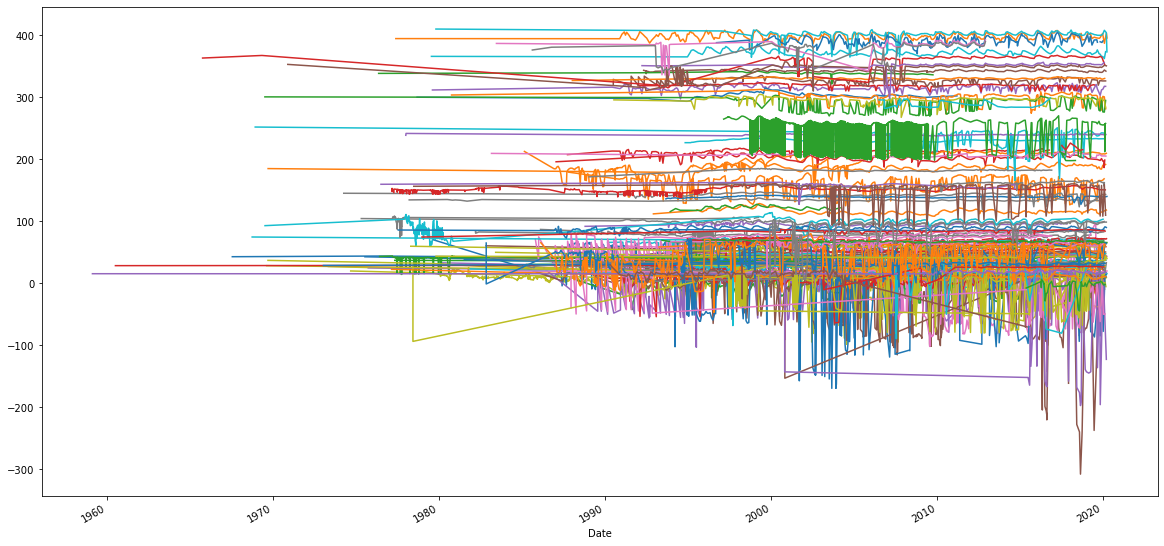

In [6]:
wells_in_df = all_data['Well Name'].unique()
for i in range(len(wells_in_df)):
    well_mask = all_data['Well Name']==wells_in_df[i]
    all_data[well_mask]['Water Level +/- MSL'].astype(float).plot(figsize=(20,10))

In [218]:
new_index = pd.date_range(all_data.index.min(), all_data.index.max())

In [221]:
master_df = pd.DataFrame(index = new_index)

In [8]:
all_data['Well Name'].unique()

array(['AAA001  KPUD KEYPORT PRODUCTION WELL 1',
       'AAA002  KPUD KEYPORT PRODUCTION WELL 2',
       'AAA005  U.OF WA.SCH.OF FISHERIES BIG BEEF TEST HOLE 2 Upper 8" PERFORATIONS',
       'AAA007  HOLLY WATER SYSTEM WELL 1',
       'AAA008  HOLLY WATER SYSTEM WELL 2',
       'AAA011  KPUD N PENINSULA SOUTH KINGSTON TEST WELL - OBS WELL',
       'AAA012  KPUD N PENINSULA KINGSTON WELL 5',
       'AAA013  WISE ACRE (ORIGINALLY A PUD WELL CALLED INDIANOLA 5)',
       'AAA014  KPUD INDIANOLA WELL 6',
       'AAA015  KPUD N PENINSULA GAMBLEWOOD 3 RITTER RD',
       'AAA016  KPUD N PENINSULA GAMBLEWOOD 1',
       'AAA103  KPUD VINLAND WS EDGEWATER 4',
       'AAA104  KPUD VINLAND WS WELL 2',
       'AAA106  KPUD N PENINSULA KINGSTON WELL 4',
       'AAA107  KPUD N PENINSULA KINGSTON WELL 3',
       "AAA108  KPUD ISLAND UTILITY MONITORING WELL (160')",
       'AAA109  KPUD ISLAND UTILITY WELL 1',
       'AAA110  PRIVATE WELL (FORMERLY KPUD ISLAND CENTER TW)',
       'AAA111  KPUD FLETCHER 

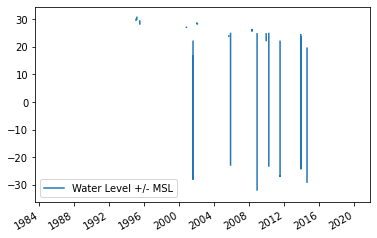

In [250]:
well_mask = all_data['Well Name']==wells_in_df[12]
well = all_data[well_mask]
well.index = pd.to_datetime(well.index )
merge = master_df.merge(well['Water Level +/- MSL'], left_index=True, right_index=True, how='left')
merge.plot()

In [260]:
wells_in_df[12]

'AAA104  KPUD VINLAND WS WELL 2'

In [261]:
pivot = pd.pivot_table(all_data, values="Water Level +/- MSL", index="Date", columns="Well Name")

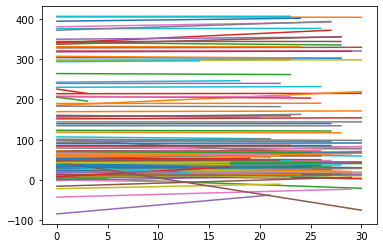

In [439]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

trends = pd.DataFrame(index = wells_in_df, columns = ['trends'])

for well in wells_in_df:
    try:
        days= 365
        
        y = pivot[well]['1990':].interpolate().resample('Y').max()
        y = y[y.first_valid_index():].ffill()
        y = y.values.reshape(-1, 1)

        #scalar.fit(y)
        #y = scalar.transform(y)

        X = np.arange(len(y)).reshape(-1, 1)
        reg = LinearRegression()
        reg.fit(X, y)
        y_hat = reg.predict(X)
        plt.plot(X,y_hat)
        trends.loc[well,'trends'] = reg.coef_[0][0]
        #y = scalar.transform(y)
    except:
        pass

In [440]:
trendy_wells = trends.sort_values(by='trends').index

In [444]:
trends.sort_values(by='trends')

,trends
AES315 KPUD PORT GAMBLE WATER SYSTEM WELL 2,-4.00386
BHN761 KPUD PORT GAMBLE LOSS MW-1,-3.60267
AES249 PITMAN,-3.234
AAB478 KPUD VINLAND WS EDGEWATER 2 REPLACEMENT,-1.33262
AEC948 KPUD INDIANOLA WELL 7,-1.19769
...,...
ACR356 KPUD FROG POND WELL 5 DECOMMISSIONED,0.802549
AAC832 KPUD NORTH BAINBRIDGE WELL 8,1.13666
ACR352 KPUD FROG POND WELL 1,1.16452
AES259 KPUD INDIAN HILLS WS LEMOLO ACRES WELL,1.44924


AAB479  KPUD MILLER BAY ESTATES 1


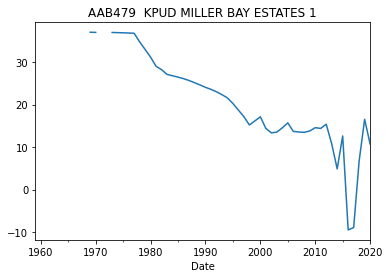

In [459]:
i=9
pivot[trendy_wells[i]].interpolate().resample('Y').max().plot(title=(trendy_wells[i]))


print(trendy_wells[i])

In [442]:
        
        trendy_wells

Index(['AES315  KPUD PORT GAMBLE WATER SYSTEM WELL 2',
       'BHN761  KPUD PORT GAMBLE LOSS MW-1', 'AES249  PITMAN',
       'AAB478  KPUD VINLAND WS EDGEWATER 2 REPLACEMENT',
       'AEC948  KPUD INDIANOLA WELL 7',
       'AAA120  ANNAPOLIS WD WATAUGA BEACH WELL 2',
       'ABV298  KPUD SALMONBERRY MONITOR WELL',
       'AAB455  KPUD NORTH BAINBRIDGE WELL 9',
       'AAA109  KPUD ISLAND UTILITY WELL 1',
       'AAB479  KPUD MILLER BAY ESTATES 1',
       ...
       'AEK852  KPUD NORTH BAINBRIDGE WELL 7', 'ACR354  KPUD FROG POND WELL 3',
       'ACK364  KPUD SOUTH BAINBRIDGE WELL 7',
       'AAC113  KPUD ISLAND UTILITY WELL 2',
       'AAB476  KPUD ELDORADO HILLS WELL 3',
       'ACR356  KPUD FROG POND WELL 5 DECOMMISSIONED',
       'AAC832  KPUD NORTH BAINBRIDGE WELL 8', 'ACR352  KPUD FROG POND WELL 1',
       'AES259  KPUD INDIAN HILLS WS LEMOLO ACRES WELL',
       'AAS286  KPUD ISLAND UTILITY WELL 3'],
      dtype='object', length=144)

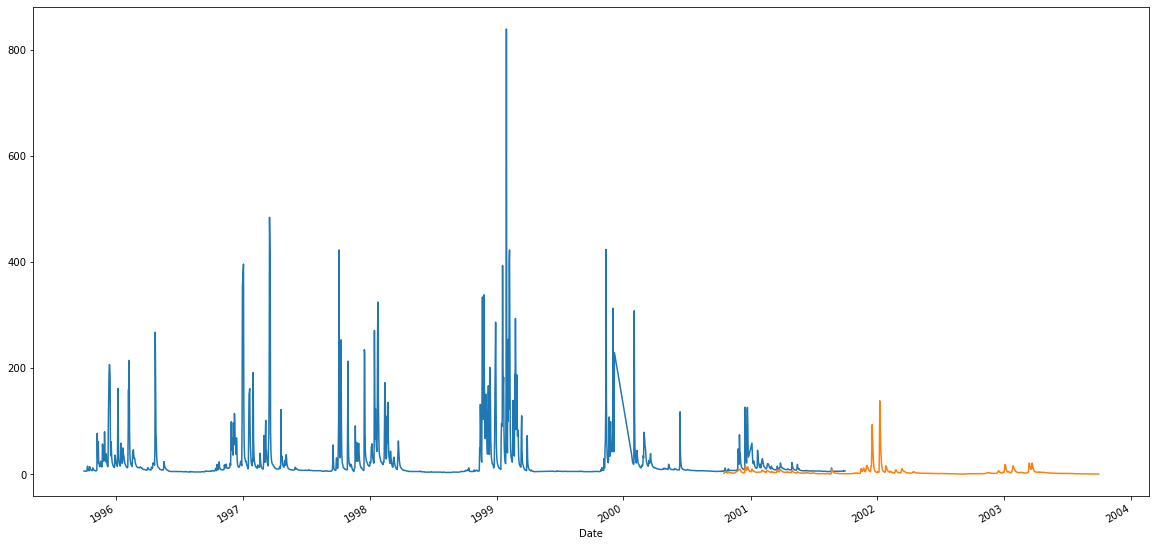

In [92]:
stations_in_df = all_data.Station.unique()
station_mask = all_data['Station']==stations_in_df[1]
all_data[station_mask]['Avg Discharge (cfs)'].astype(float).plot(figsize=(20,10))

station_mask = all_data['Station']==stations_in_df[23]
all_data[station_mask]['Avg Discharge (cfs)'].astype(float).plot(figsize=(20,10))

In [81]:
all_data[station_mask]['Avg Discharge (cfs)'].astype(float).

array(['AC  Anderson Creek - Bremerton', 'AN  Anderson Creek - Holly',
       'BA  Barker Creek', 'BB  Big Beef Creek near Seabeck',
       'BC  Burley Creek', 'BL  Blackjack Creek',
       'CC  Clear Creek - Mainstem', 'CCSW  Clear Main @ Silverdale Way'],
      dtype=object)

In [152]:
station_data.index = pd.to_datetime(station_data.index)

# Well Locations

In [ ]:
Wells can be lookup using https://appswr.ecology.wa.gov/wellconstruction/map/WCLSWebMap/textsearch.aspx
And entering the "dept. of ecology unique site identification tag number " which are the first 6 charactors of the well names


In [11]:
all_data['Site_ID'] = all_data['Well Name'].apply(lambda x: x[:6])

In [14]:
site_ids = all_data['Site_ID'].unique()

In [15]:
https://appswr.ecology.wa.gov/wellconstruction/map/WCLSWebMap/WellLogDownloadSearchResults.aspx?download=ascii

'AAA001'

In [20]:
id="ctl00_ContentPlaceHolder1_lbtnDownloadRecords" 

In [141]:
from selenium.webdriver.common.keys import Keys
import glob
import os
import zipfile



def get_site_data(site_id):
    well_search = 'https://appswr.ecology.wa.gov/wellconstruction/map/WCLSWebMap/TextSearch.aspx'
    span_id="ctl00_ContentPlaceHolder1_tbcMainContent_tbpWellIdSearch_tab"
    input_id = "ctl00_ContentPlaceHolder1_tbcMainContent_tbpWellIdSearch_txtWellTagLetters" 
    submit_id="ctl00_ContentPlaceHolder1_tbcMainContent_tbpWellIdSearch_btnTagIdSearch"
    download_id = "ctl00_ContentPlaceHolder1_lbtnDownloadRecords"
    agree_id = 'btnAgree'
    download_file_id="lnkDownLoadAscii"
    driver = webdriver.Chrome()
    try:
        driver.get(well_search)
        time.sleep(2)
        text_search_tab = driver.find_element_by_id(span_id)
        text_search_tab.click()
        time.sleep(1)
        driver.find_element_by_id(input_id).send_keys(site_id)
        time.sleep(1)
        driver.find_element_by_id(submit_id).click()
        time.sleep(1)
        driver.find_element_by_id(download_id).click()
        time.sleep(1)
        windows = driver.window_handles
        confirm_window = windows[1]
        driver.switch_to.window(confirm_window)
        driver.find_element_by_id(agree_id).click()
        time.sleep(1)
        driver.find_element_by_id(download_file_id).click()

        time.sleep(1)
        driver.quit()

        path = '/Users/garethwalker/Downloads/*' 
        list_of_files = glob.glob(path) # * means all if need specific format then *.csv
        latest_file = max(list_of_files, key=os.path.getctime)
        data = zipfile.ZipFile(latest_file)
        files_in_zip = data.namelist()
        indexes = [i for i,x in enumerate(files_in_zip) if '.csv' in x ]
        target_csv = files_in_zip[indexes[0]]
        well_data = pd.read_csv(data.open(target_csv))

    except:
        driver.quit()
        return np.nan
    return well_data

In [145]:
wells_data = pd.DataFrame()

for site_id in site_ids:
    well_data = get_site_data(site_id)
    if isinstance(well_data, pd.DataFrame):
        wells_data = wells_data.append(well_data)
    

In [138]:
well_data = get_site_data(site_ids[1])

In [147]:
wells_data.to_csv('well_meta_data.csv')

In [149]:
wells_data

,well_log_id,well_tag_nr,nit_id_nr,well_depth_qt,well_diameter_qt,well_owner_nm,township_nr,range_nr,range_dir_cd,section_nr,qtr_section_cd,qtr_qtr_section_cd,well_comp_dt,county_nm,well_type_cd,well_log_recv_dt,tax_parcel_nr,ST_PLANE_XCOORD_NR,ST_PLANE_YCOORD_NR
0,66892,AAA001,NaN,746.0,16.0,KITSAP COUNTY P U D #1,26,1,E,36,SW,NW,07/03/1975,Kitsap,W,NaN,NaN,1117063.0,869911.0
1,1007889,AAA001,D004981,20.0,10.0,Consolidated Diking Improvement #3,8,2,W,35,NE,NaN,03/03/2015,Cowlitz,W,02/02/2015,NaN,1033868.0,302471.0
2,1928545,aaa001,de01223,13.0,13.0,JETRO CASH & CARRY RESTURANT DEPOT,27,5,E,34,SE,NW,11/24/2019,King,R,11/25/2019,NaN,NaN,NaN
0,66895,AAA002,NaN,1032.0,20.0,KITSAP COUNTY P.U.D.,25,1,E,2,SE,NW,NaN,Kitsap,W,10/24/1988,NaN,1114221.0,864701.0
1,1007890,AAA002,D004981,20.0,10.0,Consolidated Diking Improvement #3,8,2,W,35,NE,NaN,03/03/2015,Cowlitz,W,02/02/2015,NaN,1033868.0,302471.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,368026,AHB466,W168675,71.0,6.0,STEVE VELIE,27,2,E,26,NW,NW,05/27/2003,Kitsap,W,08/11/2003,262702-2-033-2000,1144330.0,909205.0
0,452831,AKR190,W189602,135.0,8.0,PUD NO 1 OF KITSAP CO,23,2,E,15,SE,SE,06/22/2006,Kitsap,W,08/29/2006,152302-4-012-2008,1139172.0,788485.0
0,549360,ALK129,W238916,440.0,16.0,KITSAP CO PUD 1,27,2,E,26,NE,SW,04/04/2007,Kitsap,W,09/22/2008,262702-1-046-2007,1146949.0,907810.0
0,727423,ALK301,W238906,743.0,12.0,KITSAP PUD,25,1,W,33,SW,NW,09/08/2006,Kitsap,W,06/10/2011,NaN,1068774.0,839473.0


# Read Well Meta Data

Locations are given in State Plane Coordinate System X and Y (feet). The state coordinate system apears to be 4602 Washington South
This can be converted using http://www.earthpoint.us/StatePlane.aspx
    Confirmed with AAA002 , old military road, near Keyport

In [1]:
import pandas as pd

In [80]:
well_data =  pd.read_csv('well_meta_data.csv', index_col = 0)
well_data.head(20)

,well_log_id,well_tag_nr,nit_id_nr,well_depth_qt,well_diameter_qt,well_owner_nm,township_nr,range_nr,range_dir_cd,section_nr,qtr_section_cd,qtr_qtr_section_cd,well_comp_dt,county_nm,well_type_cd,well_log_recv_dt,tax_parcel_nr,ST_PLANE_XCOORD_NR,ST_PLANE_YCOORD_NR
0,66892,AAA001,NaN,746.0,16.0,KITSAP COUNTY P U D #1,26,1,E,36,SW,NW,07/03/1975,Kitsap,W,NaN,NaN,1117063.0,869911.0
1,1007889,AAA001,D004981,20.0,10.0,Consolidated Diking Improvement #3,8,2,W,35,NE,NaN,03/03/2015,Cowlitz,W,02/02/2015,NaN,1033868.0,302471.0
2,1928545,aaa001,de01223,13.0,13.0,JETRO CASH & CARRY RESTURANT DEPOT,27,5,E,34,SE,NW,11/24/2019,King,R,11/25/2019,NaN,NaN,NaN
0,66895,AAA002,NaN,1032.0,20.0,KITSAP COUNTY P.U.D.,25,1,E,2,SE,NW,NaN,Kitsap,W,10/24/1988,NaN,1114221.0,864701.0
1,1007890,AAA002,D004981,20.0,10.0,Consolidated Diking Improvement #3,8,2,W,35,NE,NaN,03/03/2015,Cowlitz,W,02/02/2015,NaN,1033868.0,302471.0
2,1928546,aaa002,de01223,13.0,13.0,JETRO CASH & CARRY RESTURANT DEPOT,27,5,E,34,SE,NW,11/24/2019,King,R,11/25/2019,NaN,NaN,NaN
0,781535,AAA005,NaN,301.0,NaN,UNIVERSITY OF WASHINGTON SCHOOL OF FISHERIES,25,1,W,22,NE,NE,NaN,Kitsap,W,NaN,NaN,1078315.0,852465.0
1,1007893,AAA005,D004981,20.0,10.0,Consolidated Diking Improvement #3,8,2,W,35,NE,NaN,03/03/2015,Cowlitz,W,02/02/2015,NaN,1033868.0,302471.0
2,1625334,AAA005,AE39430,301.0,8.0,UW Real Estate Office,25,1,W,22,NE,NE,09/22/2016,Kitsap,A,06/06/2017,15250140271002.0,1078315.0,852465.0
3,1928542,AAA005,De01223,22.0,22.0,JETRO CASH & CARRY RESTURANT DEPOT,27,5,E,34,SE,NW,11/24/2019,King,W,11/25/2019,NaN,NaN,NaN


In [79]:




def return_lat_long(st_x, st_y):
    geolocate = "http://www.earthpoint.us/StatePlane.aspx"
    zone_id = "ContentPlaceHolder1_Zone"
    X_id = "ContentPlaceHolder1_X"
    Y_id = "ContentPlaceHolder1_Y"
    units_feet_id="ContentPlaceHolder1_rbUnitOfMeasure_1"
    calc_id="ContentPlaceHolder1_btnXYCalc_Button1"

    driver = webdriver.Chrome()
    driver.get(geolocate)
    time.sleep(1)
    driver.find_element_by_id(zone_id).send_keys('4602')
    driver.find_element_by_id(X_id).send_keys(str(st_x))
    driver.find_element_by_id(Y_id).send_keys(str(st_y))
    driver.find_element_by_id(units_feet_id).click()
    driver.find_element_by_id(calc_id).click()
    time.sleep(1)
    content = driver.page_source
    driver.quit()

    soup = BeautifulSoup(content)
    tables = soup.findChildren('table')
    text = tables[11].findChildren(['th', 'tr'])[10].text
    lat, long= re.sub('[^0-9,.]', "", text).split(',')
    return lat, long


In [17]:
from bs4 import BeautifulSoup

In [82]:
i=12
stupid_x = well_data.iloc[1,:]['ST_PLANE_XCOORD_NR']
stupid_y = well_data.iloc[1,:]['ST_PLANE_YCOORD_NR']
return_lat_long(stupid_x,stupid_y)

('46.1375518', '122.8930667')

In [28]:

print(lat)
print(long)

47.6848109
122.6362685


In [70]:
import re


['47.6848109', '122.6362685']

In [65]:
tables[11].findChildren(['th', 'tr'])[10].text

'Degrees\xa0Lat\xa0Long\xa047.6848109°,\xa0-122.6362685°'